## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. 

Access this data using the Thinkful database using these credentials:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only *after* you've addressed missing values!

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?
2. If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.
3. Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
4. Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.
5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?
6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

Submit your work below, and plan on discussing with your mentor. You can also take a look at this [example solution](https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_outliers/solution.ipynb).

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
# import warnings

# warnings.filterwarnings('ignore')

%matplotlib inline

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [78]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [79]:
# CLEAN (YEAR-BY-YEAR)

df2 = df.copy()

cols = ["ENROLL", 
        "TOTAL_REVENUE", 
        "FEDERAL_REVENUE", 
        "STATE_REVENUE", 
        "LOCAL_REVENUE", 
        "TOTAL_EXPENDITURE", 
        "INSTRUCTION_EXPENDITURE", 
        "SUPPORT_SERVICES_EXPENDITURE",
        "OTHER_EXPENDITURE", 
        "CAPITAL_OUTLAY_EXPENDITURE", 
        "GRADES_PK_G", 
        "GRADES_KG_G", 
        "GRADES_4_G", 
        "GRADES_8_G", 
        "GRADES_12_G", 
        "GRADES_1_8_G", 
        "GRADES_9_12_G", 
        "GRADES_ALL_G"]

years = df2["YEAR"].unique()

for col in cols:
    for year in years:
        df2.loc[df2["YEAR"] == year, col] = df2.loc[df2["YEAR"] == year, col].fillna(
            df2[df2["YEAR"] == year][col].mean())

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

Yes

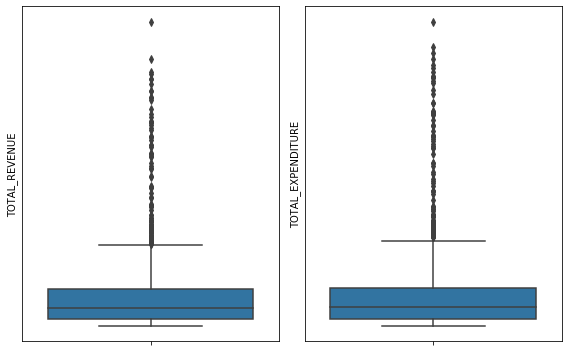

In [80]:
f, axes = plt.subplots(1, 2, figsize=(8,5), sharex=True)
sns.boxplot(x=df2.TOTAL_REVENUE, orient='v', ax=axes[0])
sns.boxplot(x=df2.TOTAL_EXPENDITURE, orient='v', ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()
#plt.show()

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [86]:
from scipy.stats.mstats import winsorize

winsorized_revenue = winsorize(df2.TOTAL_REVENUE, (0, 0.10))
winsorized_expenditure = winsorize(df2.TOTAL_EXPENDITURE, (0, 0.10))

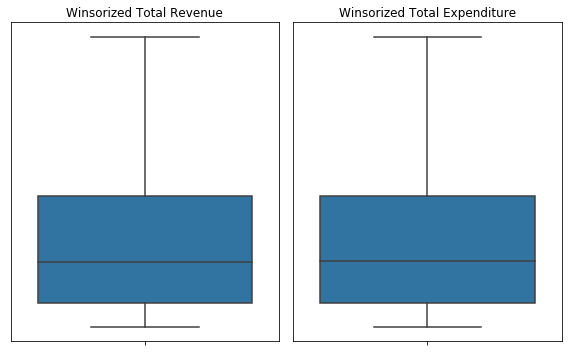

In [98]:
f, axes = plt.subplots(1, 2, figsize=(8,5), sharex=True)
sns.boxplot(x=winsorized_revenue, orient='v', ax=axes[0])
axes[0].set_title('Winsorized Total Revenue')
sns.boxplot(x=winsorized_expenditure, orient='v', ax=axes[1])
axes[1].set_title("Winsorized Total Expenditure")

plt.setp(axes, yticks=[])
plt.tight_layout()
#plt.show()

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [124]:
df3 = df2.copy()

df3['BUDGET_DEFICIT'] = df3.TOTAL_REVENUE - df3.TOTAL_EXPENDITURE

deficit = df3.TOTAL_REVENUE - df3.TOTAL_EXPENDITURE

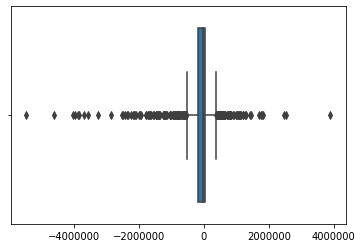

In [125]:
#sns.boxplot(x=df3.BUDGET_DEFICIT)

sns.boxplot(deficit)

Yes, there are outliers.

In [126]:
#winsorized_deficit = winsorize(df3.BUDGET_DEFICIT, (0.10, 0.10))

winsorized_deficit = winsorize(deficit, (0.10, 0.10))

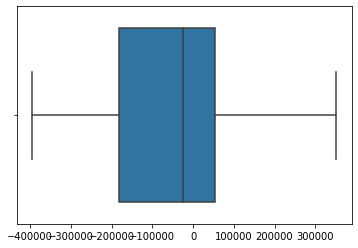

In [127]:
sns.boxplot(x=winsorized_deficit)

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [128]:
deficit2 = winsorized_revenue - winsorized_expenditure

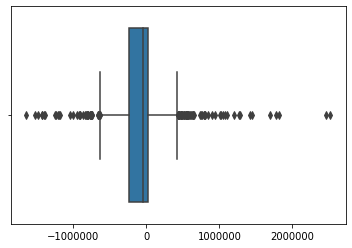

In [129]:
sns.boxplot(deficit2)

Yes, there are outliers.

In [130]:
winsorized_deficit = winsorize(deficit2, (0.10, 0.10))

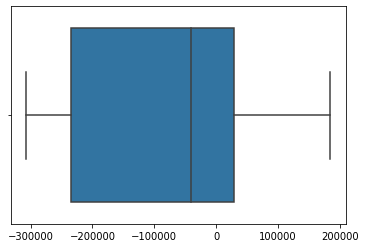

In [131]:
sns.boxplot(x=winsorized_deficit)

5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

We can see that after the 2nd winzorization (question 4), the interquartile range is larger and the minimum and maximum value thresholds are (absolutely) smaller.

6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

I would think that finding the deficit from the original values first would produce more accurate results. (3rd question)